# **Machine Learning I: Final Project**
# Predicting Allogenic Transplant Survival in Patients with 3 Types of Lymphoma



Introduction:


*   This notebook includes the code for the final project.
*   The dataset used here is available at: https://www.cibmtr.org/ReferenceCenter/PubList/PubDsDownload/Pages/default.aspx
*    The paper affiliated with the dataset is available at: https://pubmed.ncbi.nlm.nih.gov/35106754/
*    The study aimed to compare survival in patients given myeloablative vs non-myeloablative conditioning regimens as part of the treatment. Myeloablation aims to decrease the activity of the bone marrow.
*    We aim to build a binary classification model to predict patient outcomes after receiving allogenic transplant for lymphomas.



# Notebook Configuration

Setting up Google Drive for Colab

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/ml_gwu/final_project'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/ml_gwu/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/ml_gwu/code/models/p2_shallow_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Set up Matplotlib for Plotting

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

Setting up TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Set the Random Seed (For Reproducible Results)

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/MyDrive/code/utilities/p2_shallow_learning


In [ ]:
#Load in the Data
import pandas as pd
df = pd.read_sas('/content/drive/My Drive/ml_gwu/final_project/LY19-01b.sas7bdat')

# Load the raw data
df_raw = df

# Make a copy of df_raw
df = df_raw.copy(deep=True)

# Get the name of the target
target = 'dead'

#convert target to binary
df[target] = df[target].astype(bool)

In [ ]:
#Encode the target
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()
# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

,sex,graftype,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,specdis,...,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID,yeartx_year,yeartx_month,yeartx_day,yeartx_hour,yeartx_minute,yeartx_second
0,1.0,22.0,62.959617,96.743421,5.0,0.0,0,2.0,5.0,1.0,...,2.46988,1.0,17576500.0,19994368.0,1970,1,1,0,0,0
1,2.0,22.0,51.961670,118.322368,4.0,0.0,0,1.0,5.0,3.0,...,2.46988,1.0,17280082.0,19995398.0,1970,1,1,0,0,0
2,2.0,22.0,53.667351,51.250000,4.0,0.0,0,1.0,5.0,3.0,...,2.46988,1.0,24920463.0,19994497.0,1970,1,1,0,0,0
3,2.0,22.0,58.140999,138.980263,4.0,1.0,0,3.0,4.0,1.0,...,1.00000,1.0,18656371.0,19994601.0,1970,1,1,0,0,0
4,1.0,22.0,35.233402,94.736842,2.0,0.0,0,2.0,5.0,2.0,...,2.46988,1.0,16867453.0,19994536.0,1970,1,1,0,0,0


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df,
                                     train_size=0.6,
                                     random_state=random_seed,
                                     stratify=df[target])

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test,
                                   train_size=0.5,
                                   random_state=random_seed,
                                   stratify=df_test[target])

#Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)


In [ ]:
#Now we handle uncommon features

# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,PSEUDOCENTERID
1,PSEUDOCRID
2,age
3,agegp
4,agvhd24
5,agvhd34
6,anc
7,cgvhd
8,condgrp
9,condgrpnew


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
#Now that we have identified any uncommon features, we remove them

# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,1.0,22.0,2012.0,62.959617,96.743421,5.0,0.0,False,2.0,5.0,...,1.0,0.0,1.0,0.0,0.723684,0.032895,NaN,1.0,17576500.0,19994368.0
1,2.0,22.0,2010.0,51.961670,118.322368,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.493421,0.460526,NaN,1.0,17280082.0,19995398.0
2,2.0,22.0,2016.0,53.667351,51.250000,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.493421,0.592105,NaN,1.0,24920463.0,19994497.0
3,2.0,22.0,2008.0,58.140999,138.980263,4.0,1.0,False,3.0,4.0,...,1.0,0.0,1.0,0.0,0.361842,0.460526,1.0,1.0,18656371.0,19994601.0
4,1.0,22.0,2011.0,35.233402,94.736842,2.0,0.0,False,2.0,5.0,...,1.0,0.0,1.0,0.0,0.460526,0.493421,NaN,1.0,16867453.0,19994536.0


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,1.0,22.0,2011.0,49.448323,72.500000,3.0,0.0,True,1.0,5.0,...,1.0,0.0,1.0,0.0,0.032895,0.032895,NaN,1.0,17007003.0,19994536.0
1,1.0,22.0,2017.0,59.805613,48.223684,4.0,1.0,False,1.0,6.0,...,1.0,0.0,1.0,0.0,0.394737,0.592105,NaN,1.0,24894426.0,19994524.0
2,1.0,22.0,2017.0,35.619439,18.256579,2.0,0.0,True,1.0,6.0,...,1.0,0.0,1.0,0.0,0.559211,0.690789,NaN,1.0,25077945.0,19994539.0
3,1.0,22.0,2016.0,63.033539,45.230263,5.0,0.0,False,2.0,4.0,...,1.0,0.0,1.0,0.0,0.625000,0.032895,NaN,1.0,24982762.0,19994374.0
4,1.0,22.0,2015.0,44.873374,61.414474,3.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.559211,0.493421,NaN,2.0,24211825.0,19994605.0


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,2.0,22.0,2014.0,45.144422,61.776316,3.0,0.0,False,2.0,6.0,...,1.0,0.0,1.0,0.0,0.526316,0.460526,3.0,3.0,24386640.0,19994539.0
1,2.0,22.0,2012.0,56.747433,106.677632,4.0,0.0,True,1.0,4.0,...,1.0,0.0,1.0,0.0,0.690789,0.592105,NaN,1.0,16926869.0,19994545.0
2,1.0,22.0,2018.0,64.087611,10.657895,5.0,0.0,True,2.0,5.0,...,1.0,0.0,1.0,0.0,0.427632,0.559211,NaN,1.0,23208012.0,19995169.0
3,2.0,22.0,2018.0,58.551677,24.276316,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.526316,0.625000,NaN,1.0,23111106.0,19995535.0
4,2.0,1.0,2012.0,64.328542,7.302632,5.0,1.0,True,1.0,3.0,...,1.0,0.0,1.0,0.0,0.526316,0.723684,NaN,1.0,16983728.0,19994557.0


In [ ]:
#Next we handle identifiers
#Combine
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
#Find identifiers
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


In [ ]:
#Remove the identifiers
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,1.0,22.0,2012.0,62.959617,96.743421,5.0,0.0,False,2.0,5.0,...,1.0,0.0,1.0,0.0,0.723684,0.032895,NaN,1.0,17576500.0,19994368.0
1,2.0,22.0,2010.0,51.961670,118.322368,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.493421,0.460526,NaN,1.0,17280082.0,19995398.0
2,2.0,22.0,2016.0,53.667351,51.250000,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.493421,0.592105,NaN,1.0,24920463.0,19994497.0
3,2.0,22.0,2008.0,58.140999,138.980263,4.0,1.0,False,3.0,4.0,...,1.0,0.0,1.0,0.0,0.361842,0.460526,1.0,1.0,18656371.0,19994601.0
4,1.0,22.0,2011.0,35.233402,94.736842,2.0,0.0,False,2.0,5.0,...,1.0,0.0,1.0,0.0,0.460526,0.493421,NaN,1.0,16867453.0,19994536.0


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,1.0,22.0,2011.0,49.448323,72.500000,3.0,0.0,True,1.0,5.0,...,1.0,0.0,1.0,0.0,0.032895,0.032895,NaN,1.0,17007003.0,19994536.0
1,1.0,22.0,2017.0,59.805613,48.223684,4.0,1.0,False,1.0,6.0,...,1.0,0.0,1.0,0.0,0.394737,0.592105,NaN,1.0,24894426.0,19994524.0
2,1.0,22.0,2017.0,35.619439,18.256579,2.0,0.0,True,1.0,6.0,...,1.0,0.0,1.0,0.0,0.559211,0.690789,NaN,1.0,25077945.0,19994539.0
3,1.0,22.0,2016.0,63.033539,45.230263,5.0,0.0,False,2.0,4.0,...,1.0,0.0,1.0,0.0,0.625000,0.032895,NaN,1.0,24982762.0,19994374.0
4,1.0,22.0,2015.0,44.873374,61.414474,3.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.559211,0.493421,NaN,2.0,24211825.0,19994605.0


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,sex,graftype,yeartx,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,...,anc,dwoanc,platelet,dwoplatelet,intxanc,intxplatelet,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID
0,2.0,22.0,2014.0,45.144422,61.776316,3.0,0.0,False,2.0,6.0,...,1.0,0.0,1.0,0.0,0.526316,0.460526,3.0,3.0,24386640.0,19994539.0
1,2.0,22.0,2012.0,56.747433,106.677632,4.0,0.0,True,1.0,4.0,...,1.0,0.0,1.0,0.0,0.690789,0.592105,NaN,1.0,16926869.0,19994545.0
2,1.0,22.0,2018.0,64.087611,10.657895,5.0,0.0,True,2.0,5.0,...,1.0,0.0,1.0,0.0,0.427632,0.559211,NaN,1.0,23208012.0,19995169.0
3,2.0,22.0,2018.0,58.551677,24.276316,4.0,0.0,False,1.0,5.0,...,1.0,0.0,1.0,0.0,0.526316,0.625000,NaN,1.0,23111106.0,19995535.0
4,2.0,1.0,2012.0,64.328542,7.302632,5.0,1.0,True,1.0,3.0,...,1.0,0.0,1.0,0.0,0.526316,0.723684,NaN,1.0,16983728.0,19994557.0


In [ ]:
#We need to transform datetime variables into specific types
# Get the date time variables
datetime_vars = ['yeartx']

In [ ]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,sex,graftype,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,specdis,...,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID,yeartx_year,yeartx_month,yeartx_day,yeartx_hour,yeartx_minute,yeartx_second
0,1.0,22.0,62.959617,96.743421,5.0,0.0,False,2.0,5.0,1.0,...,NaN,1.0,17576500.0,19994368.0,1970,1,1,0,0,0
1,2.0,22.0,51.961670,118.322368,4.0,0.0,False,1.0,5.0,3.0,...,NaN,1.0,17280082.0,19995398.0,1970,1,1,0,0,0
2,2.0,22.0,53.667351,51.250000,4.0,0.0,False,1.0,5.0,3.0,...,NaN,1.0,24920463.0,19994497.0,1970,1,1,0,0,0
3,2.0,22.0,58.140999,138.980263,4.0,1.0,False,3.0,4.0,1.0,...,1.0,1.0,18656371.0,19994601.0,1970,1,1,0,0,0
4,1.0,22.0,35.233402,94.736842,2.0,0.0,False,2.0,5.0,2.0,...,NaN,1.0,16867453.0,19994536.0,1970,1,1,0,0,0


In [ ]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,sex,graftype,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,specdis,...,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID,yeartx_year,yeartx_month,yeartx_day,yeartx_hour,yeartx_minute,yeartx_second
0,1.0,22.0,49.448323,72.500000,3.0,0.0,True,1.0,5.0,2.0,...,NaN,1.0,17007003.0,19994536.0,1970,1,1,0,0,0
1,1.0,22.0,59.805613,48.223684,4.0,1.0,False,1.0,6.0,1.0,...,NaN,1.0,24894426.0,19994524.0,1970,1,1,0,0,0
2,1.0,22.0,35.619439,18.256579,2.0,0.0,True,1.0,6.0,2.0,...,NaN,1.0,25077945.0,19994539.0,1970,1,1,0,0,0
3,1.0,22.0,63.033539,45.230263,5.0,0.0,False,2.0,4.0,1.0,...,NaN,1.0,24982762.0,19994374.0,1970,1,1,0,0,0
4,1.0,22.0,44.873374,61.414474,3.0,0.0,False,1.0,5.0,1.0,...,NaN,2.0,24211825.0,19994605.0,1970,1,1,0,0,0


In [ ]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,sex,graftype,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,specdis,...,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID,yeartx_year,yeartx_month,yeartx_day,yeartx_hour,yeartx_minute,yeartx_second
0,2.0,22.0,45.144422,61.776316,3.0,0.0,False,2.0,6.0,1.0,...,3.0,3.0,24386640.0,19994539.0,1970,1,1,0,0,0
1,2.0,22.0,56.747433,106.677632,4.0,0.0,True,1.0,4.0,1.0,...,NaN,1.0,16926869.0,19994545.0,1970,1,1,0,0,0
2,1.0,22.0,64.087611,10.657895,5.0,0.0,True,2.0,5.0,1.0,...,NaN,1.0,23208012.0,19995169.0,1970,1,1,0,0,0
3,2.0,22.0,58.551677,24.276316,4.0,0.0,False,1.0,5.0,3.0,...,NaN,1.0,23111106.0,19995535.0,1970,1,1,0,0,0
4,2.0,1.0,64.328542,7.302632,5.0,1.0,True,1.0,3.0,3.0,...,NaN,1.0,16983728.0,19994557.0,1970,1,1,0,0,0


In [ ]:
#Handling Missing Data

# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,lymnumtreat_crf,0.814013,float64
1,intxagvhd24,0.061146,float64
2,intxagvhd34,0.061146,float64
3,intxcgvhd,0.045860,float64
4,platelet,0.022930,float64
5,intxplatelet,0.022930,float64
6,anc,0.005096,float64
7,intxanc,0.005096,float64
8,intxrel,0.001274,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,lymnumtreat_crf,0.814013,float64
1,intxagvhd24,0.061146,float64
2,intxagvhd34,0.061146,float64
3,intxcgvhd,0.045860,float64
4,platelet,0.022930,float64
5,intxplatelet,0.022930,float64
6,anc,0.005096,float64
7,intxanc,0.005096,float64
8,intxrel,0.001274,float64


In [ ]:
#separating
df[target] = df[target].astype(bool)
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,471,47


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,157,47


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,157,47


In [ ]:
#Imputing missing values
#we learn about the numerical features to provide replacments for missing values

from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

In [ ]:
#Encoding categorical variables

# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,bool
2,int64


In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,sex,graftype,age,intxsurv,agegp,kps,dead,distat,gvhdgpn,specdis,...,lymnumtreat_crf,racegpnew,PSEUDOCRID,PSEUDOCENTERID,yeartx_year,yeartx_month,yeartx_day,yeartx_hour,yeartx_minute,yeartx_second
0,1.0,22.0,62.959617,96.743421,5.0,0.0,False,2.0,5.0,1.0,...,2.46988,1.0,17576500.0,19994368.0,1970,1,1,0,0,0
1,2.0,22.0,51.961670,118.322368,4.0,0.0,False,1.0,5.0,3.0,...,2.46988,1.0,17280082.0,19995398.0,1970,1,1,0,0,0
2,2.0,22.0,53.667351,51.250000,4.0,0.0,False,1.0,5.0,3.0,...,2.46988,1.0,24920463.0,19994497.0,1970,1,1,0,0,0
3,2.0,22.0,58.140999,138.980263,4.0,1.0,False,3.0,4.0,1.0,...,1.00000,1.0,18656371.0,19994601.0,1970,1,1,0,0,0
4,1.0,22.0,35.233402,94.736842,2.0,0.0,False,2.0,5.0,2.0,...,2.46988,1.0,16867453.0,19994536.0,1970,1,1,0,0,0


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
#Split features from the target

# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
#Next, standardize the data
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
#This block standardizes the features

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

# Hyperparameter Tuning

In [ ]:
#Create the dictionary of models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed)}

In [ ]:
#Create the dictionary of pipelines
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
#Predefined split cross validator
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
#Grid Search
#Set up empty parameter grid
param_grids = {}

In [ ]:
#Logistic Regression Tuning Setup
#We choose to tune the tolerance for stopping criteria and the inverse of regularization strength
# The parameter grid of tol
tol_grid = [0.000001,0.00001,.0001,0.001,0.01] #We center around the default value of 0.0001

# The parameter grid of C
C_grid = [0.001,0.01,0.1, 1, 10,100,1000] #We center around the default value of 1.0

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
#MLP Tuning Setup
#We will tune alpha (strength of L2 reg term) and initial learning rate
# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -2)] #We center around the default value of 0.0001 or 10 ** -4

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, -1)] #We center around the default value of 0.001 or 10 ** -3

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
# Make directory
directory = os.path.dirname('/content/drive/My Drive/ml_gwu/final_project/results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
#Tune the hyperparameters
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='/content/drive/My Drive/ml_gwu/final_project/results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.598661,"{'model__C': 0.001, 'model__tol': 1e-06}","(LogisticRegression(C=0.001, class_weight='bal..."
1,0.372000,"{'model__alpha': 1e-06, 'model__learning_rate_...","(MLPClassifier(alpha=1e-06, early_stopping=Tru..."


In [ ]:
best_score_params_estimator_gs

[[0.5986609860012173,
  {'model__C': 0.001, 'model__tol': 1e-06},
  Pipeline(steps=[('model',
                   LogisticRegression(C=0.001, class_weight='balanced',
                                      random_state=42, tol=1e-06))])],
 [0.37199999999999994,
  {'model__alpha': 1e-06, 'model__learning_rate_init': 1e-05},
  Pipeline(steps=[('model',
                   MLPClassifier(alpha=1e-06, early_stopping=True,
                                 learning_rate_init=1e-05, random_state=42))])]]

We see from the above that neither model is particularly good, so we will further tune the hyperparameters.
In addition to traditional tuning, we also considering all of the options for the solver type and the penalty, leaving out the option for no penalty.

In [ ]:
#Logistic Regression Tuning Continued
#We choose to tune the tolerance for stopping criteria and the inverse of regularization strength
# The parameter grid of tol
tol_grid = [0.00000025,0.0000005,0.000001,0.000002,0.000004] #We center around the prior best value of 0.000001

# The parameter grid of C
C_grid = [0.00025,0.0005,0.001,0.002,0.004] #We center around the prior best value of 0.001

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid,
                      'model__penalty': ['l1','l2','elasticnet'], #We additionally tune the penalty type
                      'model__solver': ['newton-cg','lbfgs','liblinear','sag','saga']}] #We additionally tune the solver type

In [ ]:
#MLP Tuning Continued
#We will tune alpha (strength of L2 reg term) and initial learning rate
# The grids for alpha
alpha_grids = [0.00000025,0.0000005,0.000001,0.000002,0.000004] #We center around the prior best value of 0.000001

# The grids for learning_rate_init
learning_rate_init_grids = [0.0000025,0.000005,0.00001,0.00002,0.00004]  #We center around the prior best value of 0.00001

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
#Tune the hyperparameters
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='/content/drive/My Drive/ml_gwu/final_project/results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.850569,"{'model__C': 0.004, 'model__penalty': 'l2', 'm...","(LogisticRegression(C=0.004, class_weight='bal..."
1,0.372000,"{'model__alpha': 2.5e-07, 'model__learning_rat...","(MLPClassifier(alpha=2.5e-07, early_stopping=T..."


In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [ ]:
# Make directory
directory = os.path.dirname('/content/drive/My Drive/ml_gwu/final_project/result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
df_raw_test = df_test.copy(deep=True)

In [ ]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Transform y_test_pred back to the original class
#y_test_pred = le.inverse_transform(y_test_pred)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test['PSEUDOCRID'].to_numpy().reshape(-1, 1), y_test_pred.reshape(-1, 1))),
                         columns=['PSEUDOCRID', target])

# Generate the submission file
df_submit.to_csv('/content/drive/My Drive/ml_gwu/final_project/result/submission/submission.csv', index=False)

Plotting: We develop the confusion matrix to assess the performance of the model

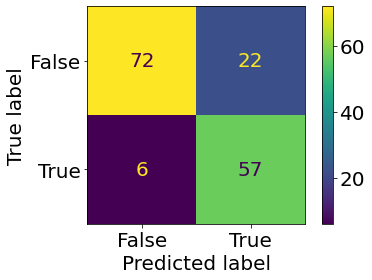

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

Precision-Recall Curve

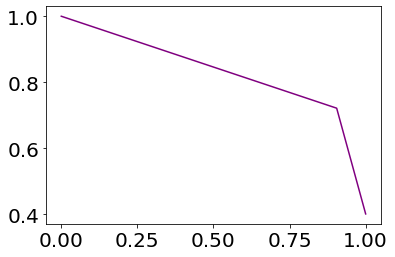

In [ ]:
#We additonally plot the precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)


fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

Now, we allow for no penalty in the Logistic Regression Model.

In [ ]:
#Logistic Regression Tuning Continued
#We choose to tune the tolerance for stopping criteria and the inverse of regularization strength
# The parameter grid of tol
tol_grid = [0.00000025,0.0000005,0.000001,0.000002,0.000004] #We center around the prior best value of 0.000001

# The parameter grid of C
C_grid = [0.00025,0.0005,0.001,0.002,0.004] #We center around the prior best value of 0.001

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid,
                      'model__penalty': ['l1','l2','elasticnet','none'], #We additionally tune the penalty type
                      'model__solver': ['newton-cg','lbfgs','liblinear','sag','saga']}] #We additionally tune the solver type

In [ ]:
#Tune the hyperparameters
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='/content/drive/My Drive/ml_gwu/final_project/results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.986744,"{'model__C': 0.00025, 'model__penalty': 'none'...","(LogisticRegression(C=0.00025, class_weight='b..."
1,0.372000,"{'model__alpha': 2.5e-07, 'model__learning_rat...","(MLPClassifier(alpha=2.5e-07, early_stopping=T..."


In [ ]:
best_score_params_estimator_gs

[[0.9867443431273218,
  {'model__C': 0.00025,
   'model__penalty': 'none',
   'model__solver': 'newton-cg',
   'model__tol': 2.5e-07},
  Pipeline(steps=[('model',
                   LogisticRegression(C=0.00025, class_weight='balanced',
                                      penalty='none', random_state=42,
                                      solver='newton-cg', tol=2.5e-07))])],
 [0.37199999999999994,
  {'model__alpha': 2.5e-07, 'model__learning_rate_init': 2.5e-06},
  Pipeline(steps=[('model',
                   MLPClassifier(alpha=2.5e-07, early_stopping=True,
                                 learning_rate_init=2.5e-06, random_state=42))])]]

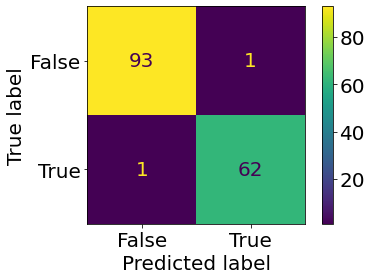

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

#Plot the new Confusion Matrix

confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)


# Conclusions

The best model is Logistic Regression, using the newton-cg solver with no penalty for high variable count. The macro f1 is about 0.98, which may imply overfitting. The four hyperparameters were tuned to:


*   C: 0.00025
*   Penalty: None
*   Solver: Newton-CG
*   Tol: 2.5e-07


If we believe that this is due to the lack of regularization, we can choose the model prior to this one that had the macro f1 of 0.85 with a penalty set to L2.

We believe that MLP was not the best type of model to use for this dataset; however, if we were to tune additional hyperparameters we may be able to improve the F1 result a little.

The main issue we encountered is the lack of data, so in the future we may oversample both classes or synthesize new records to include.